Please fill out the information of your group!

| <p style="text-align: center;">First Name</p>  | <p style="text-align: center;">Family Name</p> | Matr.-No. |
| ---------------------------------------------- | ---------------------------------------------- | -------- |
| <p style="text-align: left">*EDIT!*</p>| <p style="text-align: left">*EDIT!*</p> | *EDIT!* |
| <p style="text-align: left">*EDIT!*</p>| <p style="text-align: left">*EDIT!*</p> | *EDIT!* |


<h2 style="text-align: center">344.105/6/7 UE: Natural Language Processing (WS2022/23)</h2>
<h1 style="color:rgb(0,120,170)">Assignment 1</h1>
<h2 style="color:rgb(0,120,170)">Document Classification with Standard Machine Learning Methods</h2>

<div style="background-color:rgb(224, 243, 255)">
<b>Terms of Use</b><br>
This  material is prepared for educational purposes at the Johannes Kepler University (JKU) Linz, and is exclusively provided to the registered students of the mentioned course at JKU. It is strictly forbidden to distribute the current file, the contents of the assignment, and its solution. The use or reproduction of this manuscript is only allowed for educational purposes in non-profit organizations, while in this case, the explicit prior acceptance of the author(s) is required.

**Authors:** Navid Rekab-saz, Oleg Lesota<br>

</div>

<h2>Table of contents</h2>
<ol>
    <a href="#section-general-guidelines"><li style="font-size:large;font-weight:bold">General Guidelines</li></a>
    <a href="#section-preprocessing"><li style="font-size:large;font-weight:bold">Task A: Pre-processing & Feature Extraction (15 points)</li></a>
    <a href="#section-training"><li style="font-size:large;font-weight:bold">Task B: Training and Results Analysis (15 points)</li></a>
    <a href="#section-optional"><li style="font-size:large;font-weight:bold">Task C: Linear Model Interpretability (2 extra point)</li></a>
    
</ol>

<a name="section-general-guidelines"></a><h2 style="color:rgb(0,120,170)">General Guidelines</h2>

<div style="background-color:rgb(224, 243, 255)">

### Assignment objective

The aim of this assignment is to implement a document (sentence) classification model using (standard) machine learning methods. The assignment in total has **30 points**; it also offers **2 extra points** which can cover any missing point.

This Notebook encompasses all aspects of the assignment, namely the descriptions of tasks as well as your solutions and reports. Feel free to add any required cell for solutions. The cells can contain code, reports, charts, tables, or any other material, required for the assignment. Feel free to provide the solutions in an interactive and visual way! 

Please discuss any unclear point in the assignment in the provided forum in MOODLE. It is also encouraged to provide answers to your peer's questions. However when submitting a post, keep in mind to avoid providing solutions. Please let the tutor(s) know shall you find any error or unclarity in the assignment.

</div>


<div style="background-color:rgb(224, 243, 255)">

### Libraries & Dataset

The assignment should be implemented with recent versions of `Python` (>3.7). Any standard Python library can be used, so far that the library is free and can be simply installed using `pip` or `conda`. Examples of potentially useful libraries are `scikit-learn`, `numpy`, `scipy`, `gensim`, `nltk`, `spaCy`, and `AllenNLP`. Use the latest stable version of each library.

To conduct the experiments, we use a subset of the `HumSet` dataset [1] (https://blog.thedeep.io/humset/). `HumSet` is created by the DEEP (https://www.thedeep.io) project – an open source platform which aims to facilitate processing of textual data for international humanitarian response organizations. The platform enables the classification of text excerpts, extracted from news and reports into a set of domain specific classes. The provided dataset contains the classes (labels) referring to the humanitarian sectors like agriculture, health, and protection. The dataset contains an overall number of 17,301 data points. 

Download the dataset from the Moodle page of the course.

the provided zip file consists of the following files:
- `thedeep.subset.train.txt`: Train set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.validation.txt`: Validation set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.test.txt`: Test set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.labels.txt`: Captions of the labels.
- `thedeep.ToU.txt`: Terms of use of the dataset.

[1] HumSet: Dataset of Multilingual Information Extraction and Classification for Humanitarian Crises Response
*Selim Fekih, Nicolo' Tamagnone, Benjamin Minixhofer, Ranjan Shrestha, Ximena Contla, Ewan Oglethorpe and Navid Rekabsaz.* 
In Findings of the 2022 Conference on Empirical Methods in Natural Language Processing (Findings of EMNLP), December 2022.

</div>



<div style="background-color:rgb(224, 243, 255)">

### Submission

Each group should submit the following two files:

- One Jupyter Notebook file (`.ipynb`), containing all the code, results, visualizations, etc. **In the submitted Notebook, all the results and visualizations should already be present, and can be observed simply by loading the Notebook in a browser.** The Notebook must be self-contained, meaning that (if necessary) one can run all the cells from top to bottom without any error. Do not forget to put in your names and student numbers in the first cell of the Notebook. 
- The HTML file (`.html`) achieved from exporting the Jupyter Notebook to HTML (Download As HTML).

You do not need to include the data files in the submission.


</div>

<a name="section-preprocessing"></a><h2 style="color:rgb(0,120,170)">Task A: Pre-processing & Feature Extraction (15 points)</h2>

<div style="background-color:rgb(224, 243, 255)">
    
**Preprocessing (5 points).** Load the train, validation, and test sets. Study the text and according to your judgements, apply at least <ins>two text cleaning/preprocessing methods</ins>. Punctuations marks, numbers, dates, case-sensitivity are some examples of the elements which can be potentially considered for cleaning/preprocessing. Tokenize the result text with a tokenizer of your choice. Report your approaches to text cleaning and tokenization and the reasons of your choices. Provide some examples, showing the effects of the applied approaches on the text.

**Creating dictionary (5 points).** Create a dictionary of vocabularies following the guidelines discussed in the lecture. Next, reduce the size of dictionary using a method of your choice, for instance by considering a cut-off threshold on the tokens with low frequencies. When removing tokens from the dictionary, consider a strategy for handling Out-Of-Vocabulary (OOV) tokens, namely the ones in the train/validation/test datasets that that are not anymore in the dictionary. Some possible strategies could be to remove OOVs completely from the texts, or to replace them with a special token like <OOV\>. Explain your approaches and report the statistics of the dictionary before and after the reduction.

**Creating sentence vectors (5 points).** Use the dictionary to prepare <ins>two variations of document representation vectors</ins>, separately for train, validation, and test sets. Both variations follow a Bag-of-Words approach with a different token weighting method. One applied weighting must be `tf-idf` and the other one can be any other method discussed in the lecture such as `tc`, `tf`, `BM25`. These term weighting methods should be implemented; using a library to readily calculate the term weightings is not allowed. Report the applied approaches. Calculate and report the sparsity rate of the vectors of train, validation, and test sets, namely what percentages of the vectors in each set are filled with zeros.

</div>

In [22]:
# libraries
import os
import glob
import re
import itertools
import nltk
from nltk.tokenize import MWETokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd
import numpy as np

In [31]:
# help methods
def split_into_texts_and_labels(data):
    labels = []
    texts = data.split('\n')
    texts = [text for text in texts if len(text)>0]
    for i, text in enumerate(texts):
        try:
            nr = int(text[-1])
            labels.append(text[-1])
            texts[i] = ''.join(list(text)[:-2])
        except:
            break
    return texts, labels


def perform_basic_preprocessing(text):
    text = text.lower()

    # replace the dates with <date>
    for d in re.finditer('\d{1,2}[/-]\d{1,2}[/-]\d{2,4}', text):
        text = text.replace(str(d.group()), '<date>')

    for d in re.finditer(r'(\d{1,2}[\s]?|\d{1,2}[\s]?th[\s]?)?(?:january|february|march|april|may|june|july|august|september|october|november|december|jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec)[\s-]?(\d{1,2})?[,\s-]?[\s]?\d{4}', text, re.I|re.M):
        text = text.replace(str(d.group()), '<date>')

    for d in re.finditer(r'(\d{1,2}|\d{1,2}[\s]?th)[\s]?(?:january|february|march|april|may|june|july|august|september|october|november|december|jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec)', text, re.I|re.M):  
        text = text.replace(str(d.group()), '<date>')

    for d in re.finditer(r'\d{1,2}[/-]\d{4}', text, re.M|re.I):
        text = text.replace(str(d.group()), '<date>')
        
    # replace the remaining numbers with <num>
    text = re.sub('[0-9]*[[,.]?[0-9]+]*', '<num>', text)
    
    # remove all special characters besides <>
    text = re.sub('([^a-z<>])+', ' ', text)

    return text

def perform_tokenization(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # define tokenizer for special tokens
    tokenizer = MWETokenizer([('<', 'num', '>'), ('<', 'date', '>')])

    tokens = tokenizer.tokenize(nltk.word_tokenize(text))
    # remove stop words
    tokens = [token for token in tokens if not token in stop_words]
    # perform lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

# def compute_df(word_dict, text_tokens_list):
#    df = {} # document frequency
#    for token in word_dict:
#        for text_tokens in text_tokens_list:
#            if token in text_tokens:
                # count the number of times the token appears accross documents
#                try:
#                    df[token] += 1
#                except:
#                    df[token] = 1
#    return df

def compute_df(word_dict, tokens_per_text):
    df = {} 
    for token in word_dict:
        for token_list in tokens_per_text:
            if token in token_list:
                # count the number of times the token appears accross documents
                try:
                    df[token] += 1
                except:
                    df[token] = 1
    return df

def compute_tf(word_dict, tokens_per_text):
    tf_per_text = []
    for token_list in tokens_per_text:
        tf = {}
        for token in word_dict:
            tf[token] = ' '.join(token_list).count(token)
        tf_per_text.append(tf)
    return tf_per_text

def compute_tf_idf_mtr(word_dict, tokens_per_text):
    df = compute_df(word_dict, tokens_per_text)
    tf_per_text = compute_tf(word_dict, tokens_per_text)
    
    # compute tf-idf representation vectors
    tf_idf_per_text = []
    for tf in tf_per_text:
        tf_idf = {}
        for token, freq in tf.items():
            tf_idf[token] = np.log(1+freq) * np.log(len(tf_per_text)/(df[token]+1))
        tf_idf_per_text.append(tf_idf)

    # this is our document X word matrix
    tf_idf_df = pd.DataFrame(tf_idf_per_text.copy())
    return tf_idf_df.to_numpy()

def compute_bm25_mtr(word_dict, tokens_per_text, train_texts):
    df = compute_df(word_dict, tokens_per_text)
    tf_per_text = compute_tf(word_dict, tokens_per_text)
    
    b = 0.75
    k1 = 1.2
    # TODO TODO use original text or preprocessed text...
    # avgdl = sum([len(text) for text in tokens_per_text])/(len(train_texts))
    # or use len(token_list) for token_list in tokens_per_text...
    avgdl = sum([len(text) for text in train_texts])/(len(train_texts))
    d = [len(text) for text in train_texts]
    bm25_per_text = []
    for i, tf in enumerate(tf_per_text):
        bm25 = {}
        for token, freq in tf.items():
            bm25[token] = (((k1+1)*freq) / ((k1*(1-b+b*(d[i]/avgdl))) + freq)) * np.log(len(tf_per_text)/(df[token]+1))
        bm25_per_text.append(bm25)

    bm25_df = pd.DataFrame(bm25_per_text.copy())
    return bm25_df.to_numpy()

In [24]:
# Load the train, validation, and test sets. 
files = glob.glob(os.path.join('nlp2023_24_data', '**', '*'))

for file in files:
    if os.path.basename(file).__contains__('train'):
        with open(file, 'r') as fh:
            train_data = fh.read()
    elif os.path.basename(file).__contains__('test'):
        with open(file, 'r') as fh:
            test_data = fh.read()
    elif os.path.basename(file).__contains__('validation'):
        with open(file, 'r') as fh:
            val_data = fh.read()
    elif os.path.basename(file).__contains__('labels'):
        with open(file, 'r') as fh:
            labels = fh.read()

print(len(train_data))

train_texts, train_labels = split_into_texts_and_labels(train_data)
val_texts, val_labels = split_into_texts_and_labels(val_data)
test_texts, test_labels = split_into_texts_and_labels(test_data)

5584346


In [25]:
tokens_per_text = []
for text in train_texts:
    tokens_per_text.append(perform_tokenization(perform_basic_preprocessing(text)))

In [26]:
word_dict = dict(Counter(list(itertools.chain(*tokens_per_text))))
word_dict = dict(sorted(word_dict.items(), key=lambda x:x[1], reverse=True))
print(len(word_dict))
# print(word_dict)

23865


In [27]:
# TODO ONLY FOR TESTING, ~1650 words with 50...
threshold = 100 # 50
smaller_word_dict = {k:v for (k,v) in word_dict.items() if v > threshold}
print(len(smaller_word_dict))

951


In [28]:
tf_idf_mtr = compute_tf_idf_mtr(smaller_word_dict, tokens_per_text)

In [30]:
print(tf_idf_mtr)
print((tf_idf_mtr == 0).mean())

[[-9.07156839e-05  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.71705672e-04  0.00000000e+00  1.02829920e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-5.72352241e-05  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-5.72352241e-05  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-5.72352241e-05  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.14470448e-04  0.00000000e+00  1.02829920e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
0.9566109297788151


In [8]:
# compute document frequency
# df = {} # document frequency
# for token in smaller_word_dict:
#    for token_list in tokens_per_text:
#        if token in token_list:
#            # count the number of times the token appears accross documents
#            try:
#                df[token] += 1
#            except:
#                df[token] = 1
# print(df)

In [9]:
# compute term frequency
# now we have to check how often the token does appear in a single document
# tf_per_text = []
# for token_list in tokens_per_text:
#    tf = {}
#    for token in smaller_word_dict:
#        tf[token] = ' '.join(token_list).count(token)
#    tf_per_text.append(tf)

In [10]:
# compute tf-idf representation vectors
# tf_idf_per_text = []
# for tf in tf_per_text:
#    tf_idf = {}
#    for token, freq in tf.items():
#        tf_idf[token] = np.log(1+freq) * np.log(len(tf_per_text)/(df[token]+1))
#    tf_idf_per_text.append(tf_idf)

# this is our document X word matrix
# tf_idf_df = pd.DataFrame(tf_idf_per_text.copy())
# print(tf_idf_df)

        <_num_>  case  <_date_>      food    people  reported      area  \
0     -0.000091   0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1     -0.000172   0.0  1.028299  1.974088  1.051128  0.000000  1.769056   
2     -0.000057   0.0  0.000000  1.974088  0.000000  0.000000  0.000000   
3     -0.000091   0.0  1.028299  0.000000  0.000000  0.000000  2.591620   
4     -0.000205   0.0  1.028299  0.000000  0.000000  0.000000  0.000000   
...         ...   ...       ...       ...       ...       ...       ...   
12105 -0.000114   0.0  0.000000  0.000000  2.102257  0.000000  0.000000   
12106 -0.000172   0.0  0.000000  1.245511  0.000000  0.000000  0.000000   
12107 -0.000057   0.0  0.000000  0.000000  0.000000  1.216111  0.000000   
12108 -0.000057   0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
12109 -0.000114   0.0  1.028299  1.245511  0.000000  0.000000  0.000000   

          child     water  health  ...  therefore  type  neighbourhood  zor  \
0      1.263343  0.0

In [32]:
# second term weighting is bm25
# those hyperparameters work well for most corpuses
# |d| == len of current document???
# b = 0.75
# k1 = 1.2
# TODO TODO use original text or preprocessed text...
# avgdl = sum([len(text) for text in tokens_per_text])/(len(train_texts))
# or use len(token_list) for token_list in tokens_per_text...
# avgdl = sum([len(text) for text in train_texts])/(len(train_texts))
# d = [len(text) for text in train_texts]
# print(avgdl)
# bm25_per_text = []
# for i, tf in enumerate(tf_per_text):
#     bm25 = {}
#    for token, freq in tf.items():
#        bm25[token] = (((k1+1)*freq) / ((k1*(1-b+b*(d[i]/avgdl))) + freq)) * np.log(len(tf_per_text)/(df[token]+1))
#    bm25_per_text.append(bm25)

# TODO use pandas to define dataframes
# bm25_df = pd.DataFrame(bm25_per_text.copy())
# print(bm25_df)

# compute the sparsity
bm25_mtr = compute_bm25_mtr(smaller_word_dict, tokens_per_text, train_texts)
print((bm25_mtr == 0).mean())

0.9566109297788151


<div style="background-color:rgb(224, 243, 255)">

To evaluate the models, use <ins>accuracy</ins> as the metric throughout the task. 

**Dummy baseline (2 points).** Create one dummy baseline classifier that predicts the validation/test labels only based on the distribution of the labels in the training set (without any use of the feature vectors). This is a weak baseline and acts as a sanity check for the actual classifiers.

**Training and tuning classifiers (5 points).** Select at least <ins>two classification algorithms</ins> from standard machine learning classifiers. Using each classification algorithm, train a machine learning model on each of the variations of feature vectors. This should result in <ins>four experiment sets</ins> (2 variations of feature vectors × 2 classification algorithms). The ML model in each of the experiments possibly have several involving hyper-parameters. For each experiment, select <ins>one of the hyper-parameters and tune its value</ins>. The tuning process is done by first assigning at least <ins>three values</ins> to the hyper-parameter, then training separate models based on each value, and finally using the evaluation results on the validation set to select the best-performing model. Report the studied hyper-parameters, the evaluation results of each on validation set, and finally the selected value of the hyper-parameter. 

**Evaluation, reporting results, and discussion (3 point).** Evaluate the selected models of the four experiments on the test set. Report the results of <ins>the four experiments on both validation and test sets (side by side) in one table as well as in one plot</ins>. Compare different experiments and models. Are the test results lower(/higher) than the validation results? If it is the case, where can it be rooted from? Among all these models and variations, what are the most important factors improving the classification results?

**Confusion matrix (2 point).** Select the best performing model among the experiments and use it to create a confusion matrix. The matrix shows the predicted versus true results per each label. Explain your observations on the matrix. Across which classes do you observe significant confusions?

**Features visualization (3 point).** Continue with the best performing model and now take its feature vectors for the *dataitems in the test set*. Project these feature vectors to a 2-dimensional space using the TSNE method.  Using these 2-dimensional vectors, create two plots where the dataitems are shown as points (small circles) on the plots. The plots look exactly the same but only differ in the coloring of the data points. The first plot colors every dataitem with its *true label*, while the second one colors each according to its *predicted label by the model*. Keep in mind to assign the same colors to the classes of the plots, so that the plots are visually comparable. Put these two plots side by side, observe the differences, and compare the results. Report your observations.


</div>

In [72]:
# libraries
from collections import Counter
import random
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [62]:
# dummy baseline
def dummy_baseline(text):
    total_count = sum(Counter(train_labels).values())
    labels_abs_count_dict = dict(Counter(train_labels))
    labels_rel_count_dict = {k: v / total_count for k, v in labels_abs_count_dict.items()}
    return random.choices(list(labels_rel_count_dict.keys()), weights=list(labels_rel_count_dict.values()), k=1)

In [63]:
# prepare everything for validation
tokens_per_text_val = []
for text in val_texts:
    tokens_per_text_val.append(perform_tokenization(perform_basic_preprocessing(text)))
tf_idf_mtr_val = compute_tf_idf_mtr(smaller_word_dict, tokens_per_text_val)
bm25_mtr_val = compute_bm25_mtr(smaller_word_dict, tokens_per_text_val, val_texts)
train_labels = np.array(train_labels).astype('int')
val_labels = np.array(val_labels).astype('int')

In [66]:
vector_types = ['tf-idf', 'bm25']
kernels = ['linear', 'poly', 'rbf']
max_acc = 0
best_hyperparam = ''
vec = ''
for vector_type in vector_types:
    if vector_type == 'tf_idf':
        train_data = tf_idf_mtr
        val_data = tf_idf_mtr_val
    else:
        train_data = bm25_mtr
        val_data = bm25_mtr_val
    for kernel in kernels:
        svc = SVC(kernel=kernel).fit(train_data, train_labels)
        preds = svc.predict(val_data)
        acc = accuracy_score(val_labels, preds.astype('int'))
        if acc > max_acc:
            max_acc = acc
            best_hyperparam = kernel
            vec = vector_type
            
print(max_acc)
print(best_hyperparam)
print(vec)

0.7842835130970724
rbf
tf-idf


In [69]:
vector_types = ['tf-idf', 'bm25']
n_estimators = [50, 100, 250]
max_acc = 0
best_hyperparam = ''
vec = ''
for vector_type in vector_types:
    if vector_type == 'tf_idf':
        train_data = tf_idf_mtr
        val_data = tf_idf_mtr_val
    else:
        train_data = bm25_mtr
        val_data = bm25_mtr_val
    for est in n_estimators:
        rfc = RandomForestClassifier(n_estimators=est).fit(train_data, train_labels)
        preds = rfc.predict(val_data)
        acc = accuracy_score(val_labels, preds.astype('int'))
        if acc > max_acc:
            max_acc = acc
            best_hyperparam = est
            vec = vector_type
print(max_acc)
print(best_hyperparam)
print(vec)

0.7781201848998459
100
tf-idf


In [ ]:
# do the same for the test sets and plot all the accuracies...

In [ ]:
# confusion_matrix(y_true, y_pred)

In [70]:
tokens_per_text_test = []
for text in test_texts:
    tokens_per_text_test.append(perform_tokenization(perform_basic_preprocessing(text)))
tf_idf_mtr_test = compute_tf_idf_mtr(smaller_word_dict, tokens_per_text_test)
bm25_mtr_test = compute_bm25_mtr(smaller_word_dict, tokens_per_text_test, test_texts)

In [73]:
# downprojection
mtr_embedded = TSNE(n_components=2).fit_transform(tf_idf_mtr_test)
print(mtr_embedded.shape)

(2595, 2)


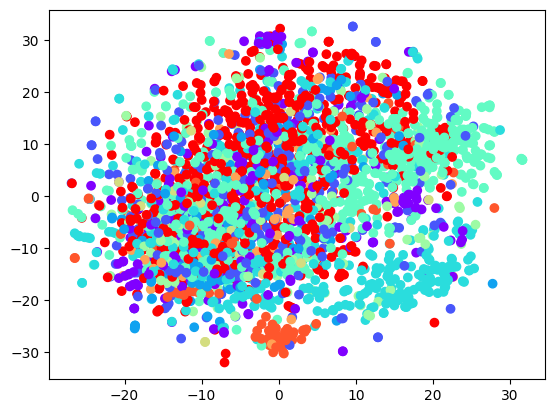

In [81]:
colormap = plt.cm.rainbow(np.linspace(0, 1, 10))
plt.scatter(mtr_embedded[:, 0], mtr_embedded[:, 1], c=colormap[np.array(test_labels).astype('int')])
# plt.show()

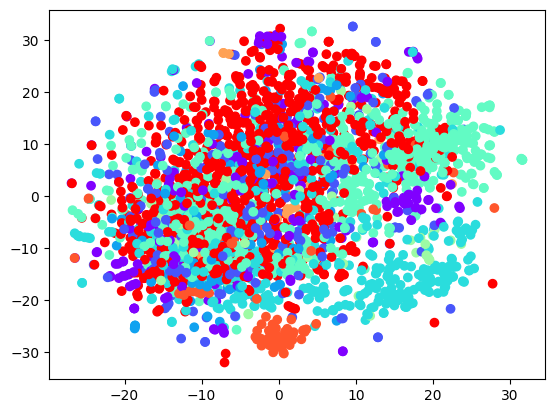

In [82]:
svc = SVC(kernel='rbf').fit(tf_idf_mtr, train_labels)
preds = svc.predict(tf_idf_mtr_test)
colormap = plt.cm.rainbow(np.linspace(0, 1, 10))
plt.scatter(mtr_embedded[:, 0], mtr_embedded[:, 1], c=colormap[np.array(preds).astype('int')])

<a name="section-optional"></a><h2 style="color:rgb(0,120,170)">Task C: Linear Model Interpretability (2 extra points)</h2>

<div style="background-color:rgb(224, 243, 255)">
Train a logistic regression model on one of the document representations. Take the coefficient weights, learned by the model, on each dimension (which here corresponds to each token in the dictionary). Separately for each class, study what are the tokens that have the highest contributions/importance for the predictions of the model.
</div>